In [2]:
import pandas as pd

In [3]:
winequality_red_df = pd.read_csv("winequality-data/winequality-red.csv", delimiter=";", index_col=False)
winequality_white_df = pd.read_csv("winequality-data/winequality-white.csv", delimiter=";", index_col=False)

# add identifier for white/red wine
winequality_red_df['color'] = 1
winequality_white_df['color'] = 0

# concat dataframes
wine_quality_df = pd.concat([winequality_white_df, winequality_red_df],axis=0).set_index(['color'])

Classification task: predict ‘color‘ from the other features, including
‘quality‘.

In [4]:

abalone_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']  
abalone_df = pd.read_csv("abalone-data/abalone.csv", names=abalone_headers, index_col=['Rings'])

Classification task: predict ‘Rings‘ from the other features, this feature
is essentially the age of the fish. Note that one of the features is categorical

# 1. Assesment of Data and Applying Normalization

## 1.1 Is there any missing data?

In [4]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [5]:
len(abalone_df)

4177

In [6]:
wine_quality_df.reset_index().describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
len(wine_quality_df)

6497

Since the full the `describe` function for both dataframes shows that the total length of the dataframes matches with the `count` of non-null/non-NA observations we can conclude there is no missing data in wine quality and abalone data sets.

## 1.2 Compute the moments or summarization statistics on the data features (mean, median, variance, skew, kurtosis). Do these highlight anything interesting about the different features? 


In [8]:
abalone_df.reset_index().describe()

,Rings,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,9.933684,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,3.224169,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,8.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,9.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,11.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,29.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


array([[<AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>, <AxesSubplot:>]],
      dtype=object)

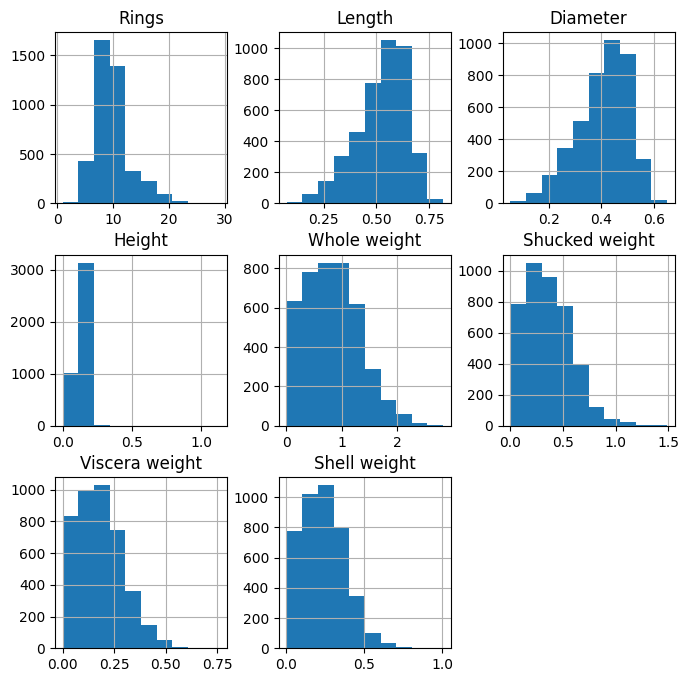

In [9]:
abalone_df.reset_index().hist(figsize=(8,8))

array([[<AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

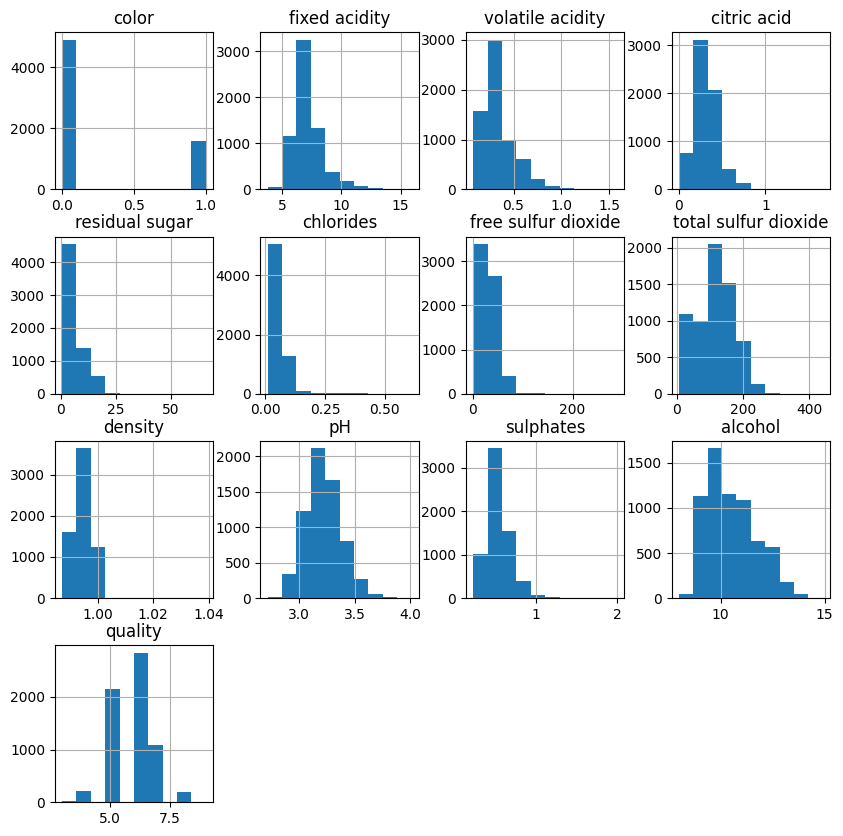

In [10]:
wine_quality_df.reset_index().hist(figsize=(10,10))

In [11]:
wine_quality_skew = wine_quality_df.reset_index().skew(axis=0, numeric_only=True)
wine_quality_kurtosis = wine_quality_df.reset_index().kurtosis(axis=0, numeric_only=True)
wine_quality_mean = wine_quality_df.reset_index().mean(axis=0, numeric_only=True)
wine_quality_var = wine_quality_df.reset_index().var(axis=0, numeric_only=True)
wine_quality_median = wine_quality_df.reset_index().median(axis=0, numeric_only=True)

wine_quality_skew.name = 'skew'
wine_quality_kurtosis.name = 'kurtosis'
wine_quality_mean.name = 'mean'
wine_quality_var.name = 'variance'
wine_quality_median.name = 'median'

wine_quality_statistics = pd.concat([wine_quality_mean, wine_quality_median, wine_quality_var, wine_quality_skew, wine_quality_kurtosis ], axis=1)
wine_quality_statistics

,mean,median,variance,skew,kurtosis
color,0.246114,0.00000,0.185570,1.179095,-0.609922
fixed acidity,7.215307,7.00000,1.680740,1.723290,5.061161
volatile acidity,0.339666,0.29000,0.027105,1.495097,2.825372
citric acid,0.318633,0.31000,0.021117,0.471731,2.397239
residual sugar,5.443235,3.00000,22.636696,1.435404,4.359272
chlorides,0.056034,0.04700,0.001227,5.399828,50.898051
free sulfur dioxide,30.525319,29.00000,315.041192,1.220066,7.906238
total sulfur dioxide,115.744574,118.00000,3194.720039,-0.001177,-0.371664
density,0.994697,0.99489,0.000009,0.503602,6.606067
pH,3.218501,3.21000,0.025853,0.386839,0.367657


In [12]:
abalone_skew = abalone_df.reset_index().skew(axis=0, numeric_only=True)
abalone_kurtosis = abalone_df.reset_index().kurtosis(axis=0, numeric_only=True)
abalone_mean = abalone_df.reset_index().mean(axis=0, numeric_only=True)
abalone_var = abalone_df.reset_index().var(axis=0, numeric_only=True)
abalone_median = abalone_df.reset_index().median(axis=0, numeric_only=True)

abalone_skew.name = 'skew'
abalone_kurtosis.name = 'kurtosis'
abalone_mean.name = 'mean'
abalone_var.name = 'variance'
abalone_median.name = 'median'

abalone_statistics = pd.concat([abalone_mean, abalone_median, abalone_var, abalone_skew, abalone_kurtosis ], axis=1)
abalone_statistics

,mean,median,variance,skew,kurtosis
Rings,9.933684,9.0000,10.395266,1.114102,2.330687
Length,0.523992,0.5450,0.014422,-0.639873,0.064621
Diameter,0.407881,0.4250,0.009849,-0.609198,-0.045476
Height,0.139516,0.1400,0.001750,3.128817,76.025509
Whole weight,0.828742,0.7995,0.240481,0.530959,-0.023644
Shucked weight,0.359367,0.3360,0.049268,0.719098,0.595124
Viscera weight,0.180594,0.1710,0.012015,0.591852,0.084012
Shell weight,0.238831,0.2340,0.019377,0.620927,0.531926


Some skew exists although it is minimal from looking at the histogram of the two data sets. Furthermore, the means and medians for the features are pretty close to each other implying the data is close to being symmetrical. 

## 1.3 Use a pairsplot (the seaborn library has a nice one, for example) to look at the whole of the dataset. Choose a subset, just some features, and show it in your report to highlight some features that seem important

In [5]:
import seaborn
import matplotlib.pyplot as plt

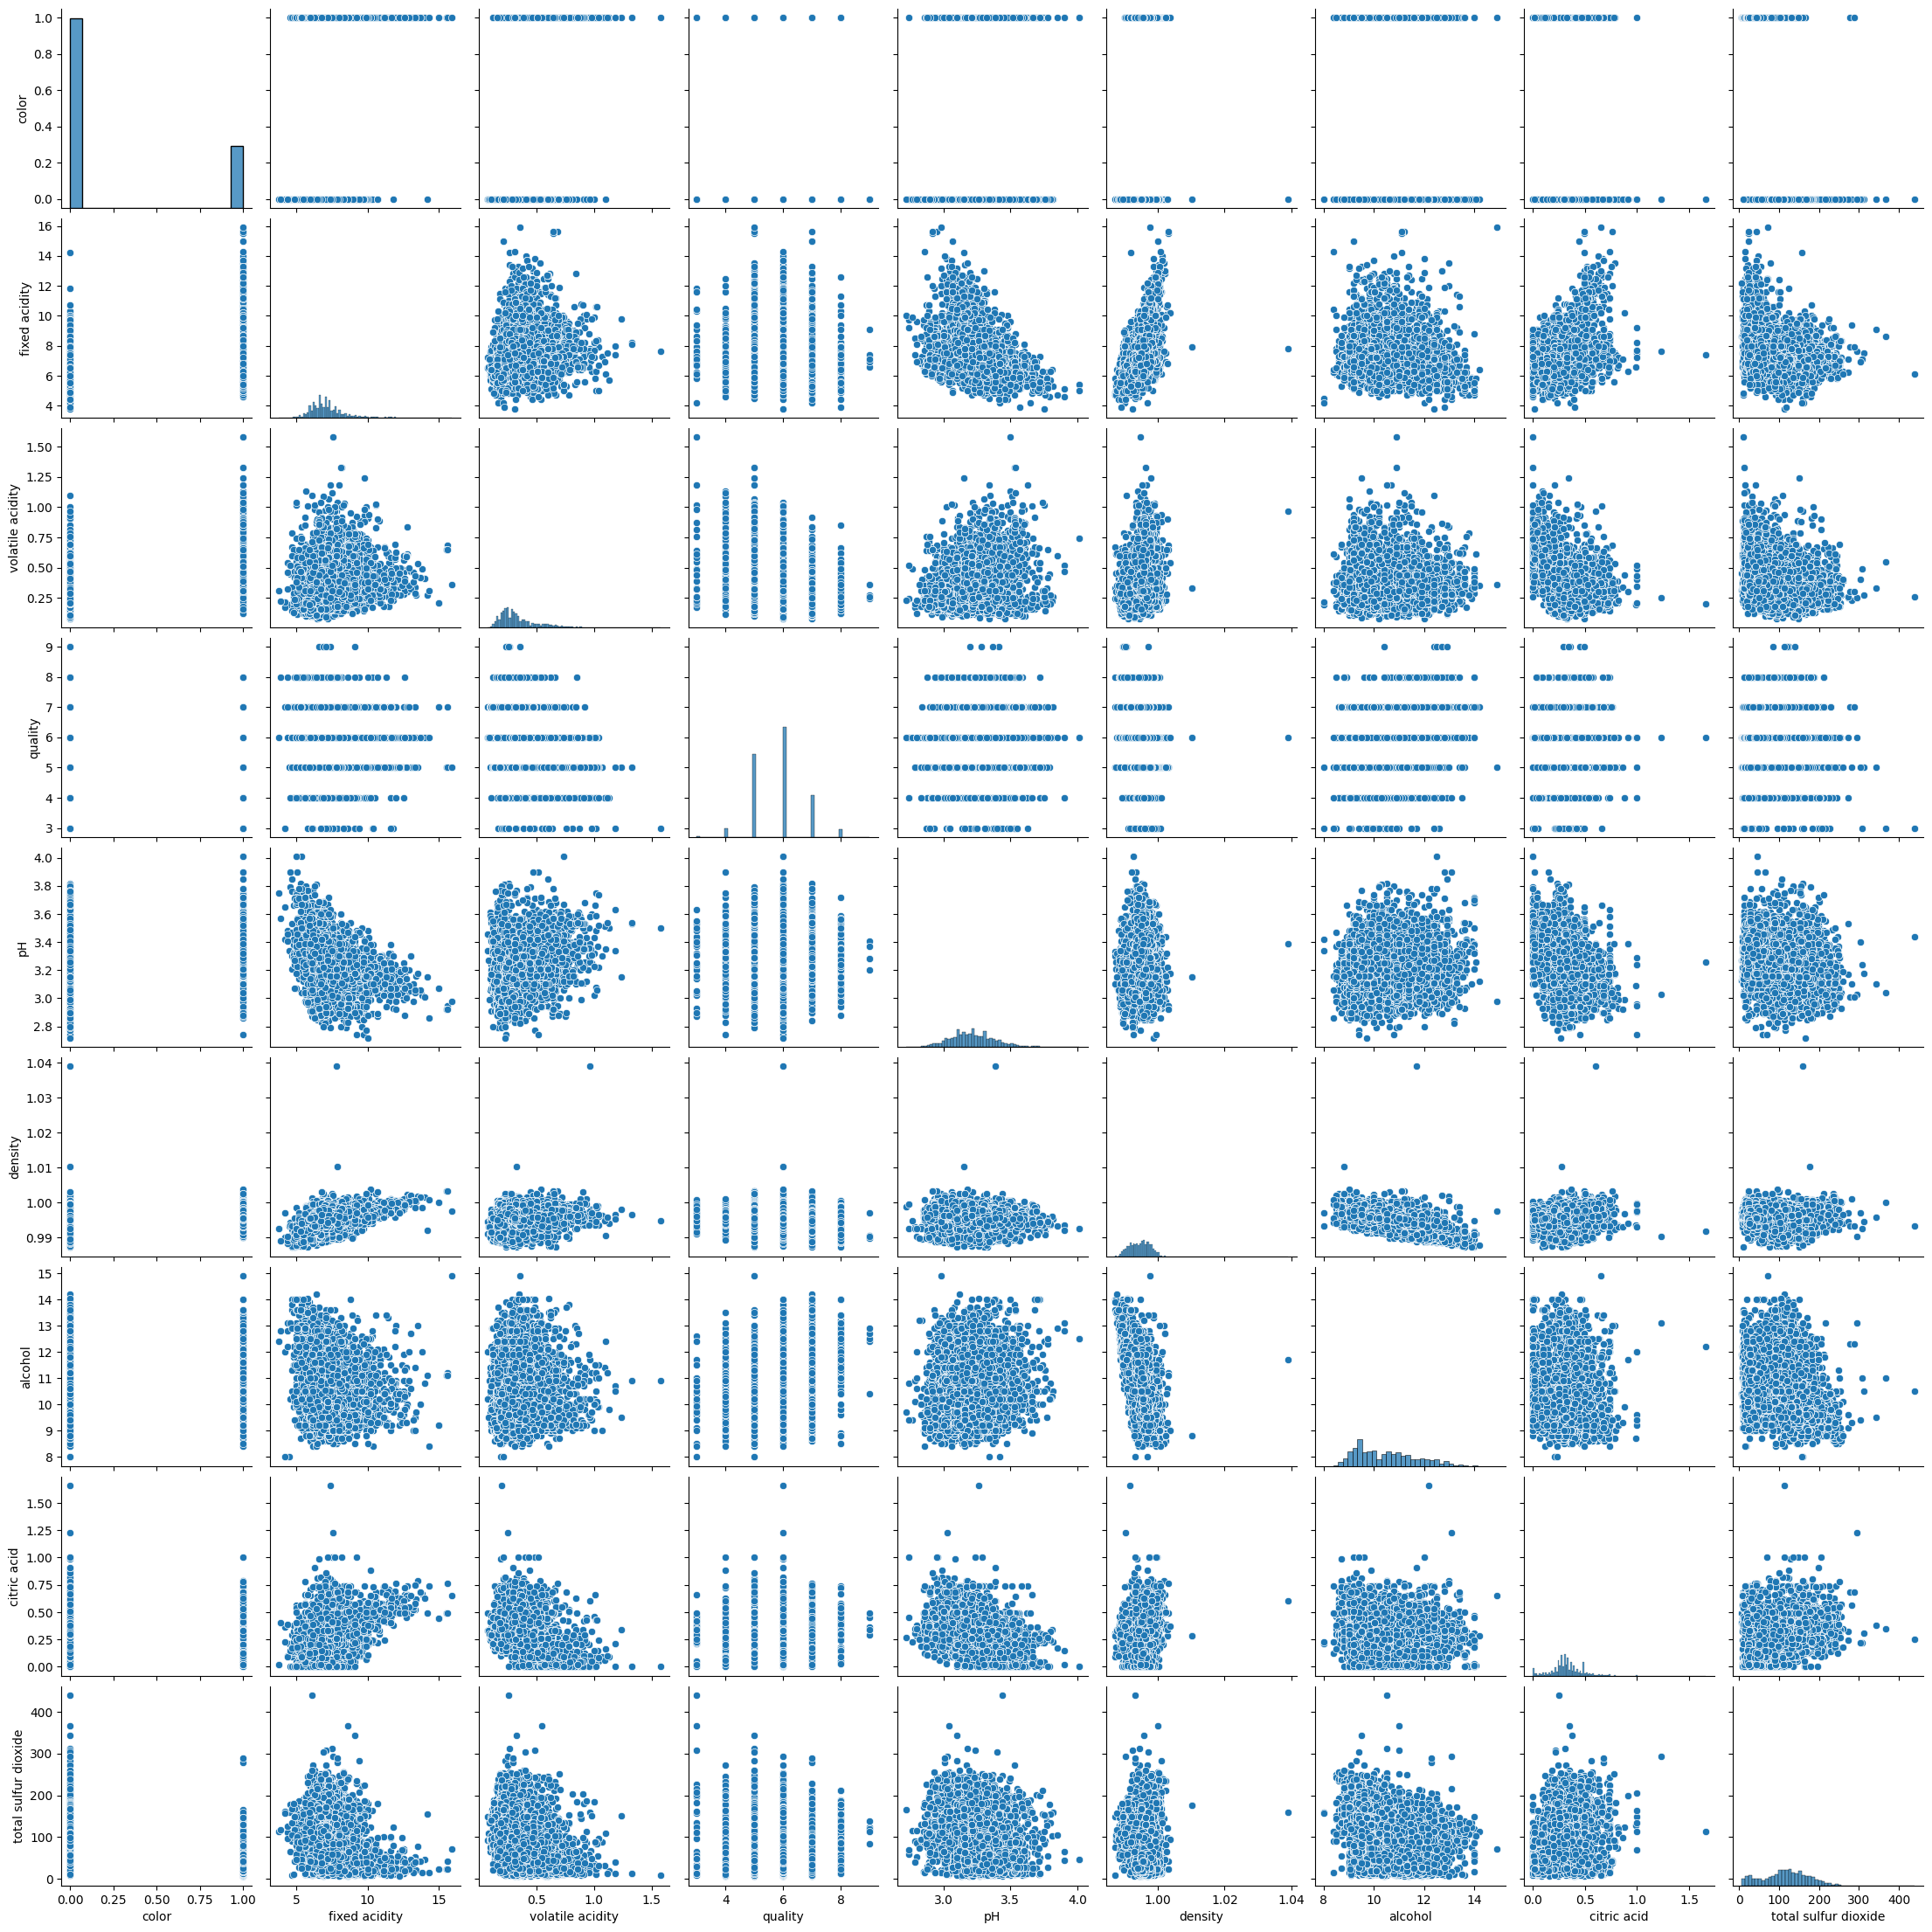

In [14]:
seaborn.pairplot(wine_quality_df.reset_index()[['color', 'fixed acidity', 'volatile acidity', 'quality', 'pH', 'density', 'alcohol', 'citric acid', 'total sulfur dioxide']])

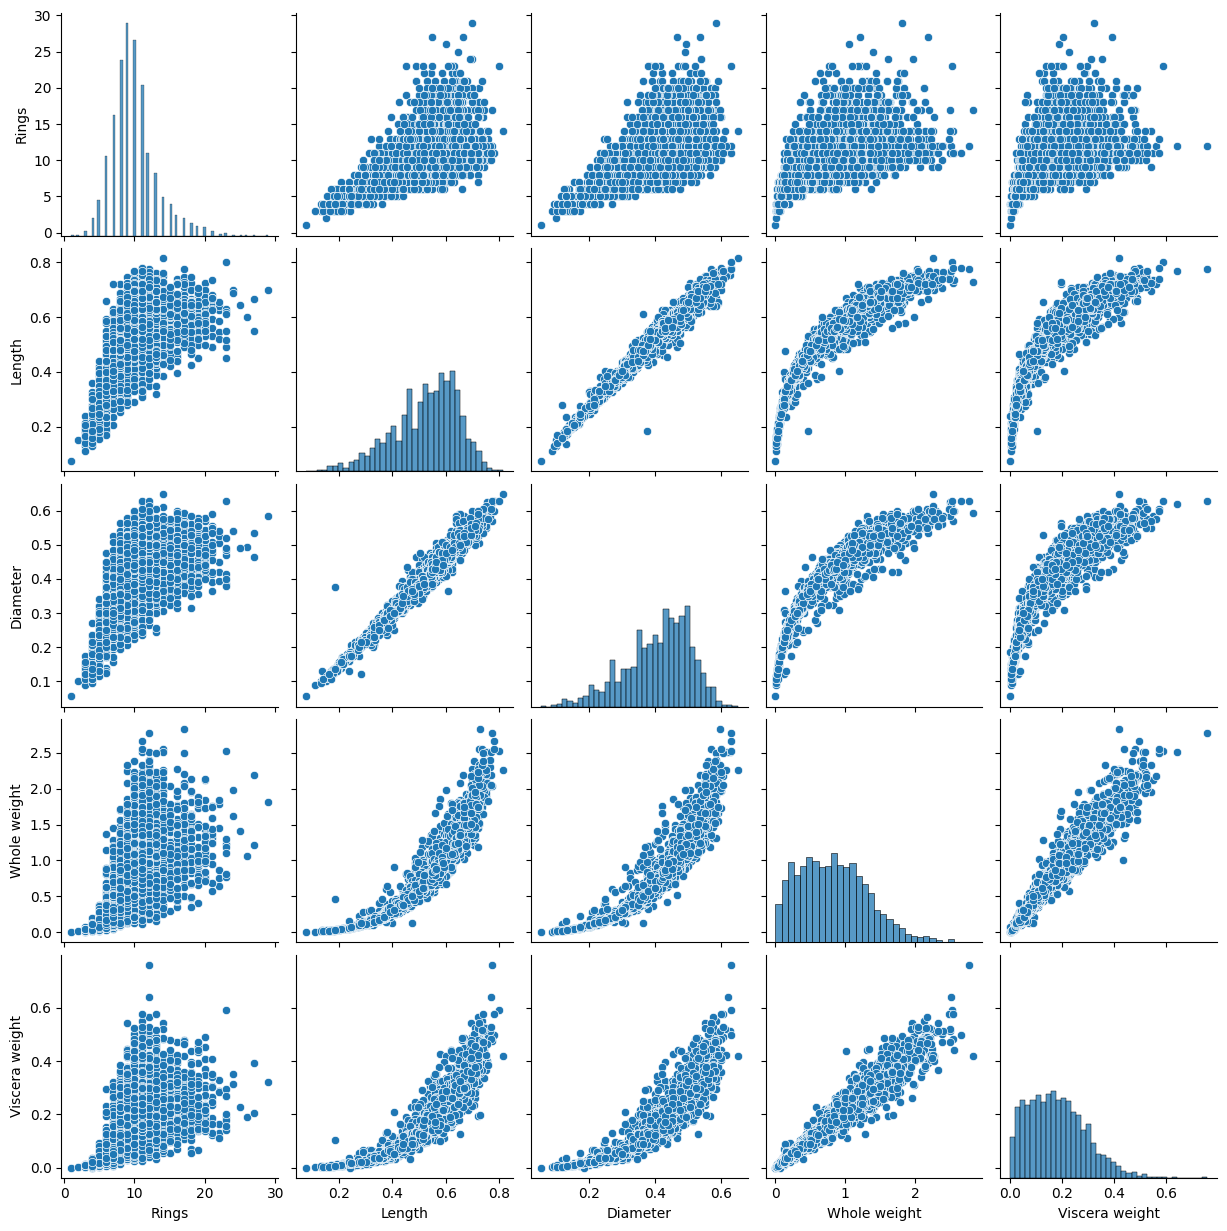

In [15]:
seaborn.pairplot(abalone_df.reset_index()[['Rings', 'Length', 'Diameter', 'Whole weight', 'Viscera weight']])

## 1.4 s this a balanced dataset? If not, what kind of correction could we apply?

The abalone dataset is pretty balanced (there is a varying amount of ring sizes for instance). However, the wine quality data set is not balanced there is almost 3x as much white wine data as there is red wine date. To correct this, either the white wine dataset can be reduced to have the same number of samples as red whine or we can sample the red whine data 3x more than the white wine to help balance the dataset. 

# 2. Classification with KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
# normalize data - normalize all features except feature we want to classify
scaler = StandardScaler()
wine_color = wine_quality_df.reset_index()['color']
normalized_wine_quality = scaler.fit_transform(wine_quality_df.reset_index().iloc[:,1:])
normalized_wine_quality = pd.DataFrame(normalized_wine_quality, columns=wine_quality_df.reset_index().iloc[:,1:].columns)
normalized_wine_quality['color'] = wine_color
wine_quality_df = normalized_wine_quality

#split data into test train 80/20 split
y_wine_qualtiy = wine_quality_df.reset_index()['color'].to_numpy()
X_wine_quality = wine_quality_df.reset_index().iloc[:,1:].loc[:, wine_quality_df.columns != 'color'].to_numpy()

# set random state to 42 to allow for reproducibility
X_wq_train, X_wq_test, y_wq_train, y_wq_test = train_test_split(X_wine_quality, y_wine_qualtiy, random_state=42, test_size=0.20)

In [8]:
# split data into test train 80/20 split

# normalize data - except for 'Sex' attribute and 'Rings' predictor variable
scaler = StandardScaler()
abalone_rings = abalone_df.reset_index()['Rings']
# should M/F be converted to binary '1' or '0' when training abalone data set?
abalone_gender = abalone_df.reset_index()['Sex'].apply(lambda col: 1 if col == 'M' else 0)
normalized_abalone = scaler.fit_transform(abalone_df.reset_index().iloc[:,2:])
normalized_abalone = pd.DataFrame(normalized_abalone, columns=abalone_df.reset_index().iloc[:,2:].columns)
normalized_abalone['Rings'] = abalone_rings
normalized_abalone['Sex'] = abalone_gender
abalone_df = normalized_abalone


y_abalone = abalone_df.reset_index()['Rings'].to_numpy()
X_abalone = abalone_df.reset_index().iloc[:,1:].loc[:,abalone_df.columns != 'Rings'].to_numpy()

# set random state to 42 to allow for reproducibility
X_abalone_train, X_abalone_test, y_abalone_train, y_abalone_test = train_test_split(X_abalone, y_abalone, random_state=42, test_size=0.20)

## KNN default params

In [19]:
knn_wq = KNeighborsClassifier()
knn_wq.fit(X_wq_train,y_wq_train)
# Predicting results using Test data set
pred_wq = knn_wq.predict(X_wq_test)
print(f"Default Params KNN for wine quality data set accuracy {round(accuracy_score(pred_wq,y_wq_test)*100,3)}%")

Default Params KNN for wine quality data set accuracy 99.154%


In [20]:
knn_abalone = KNeighborsClassifier()
knn_abalone.fit(X_abalone_train,y_abalone_train)
# Predicting results using Test data set
pred_abalone = knn_abalone.predict(X_abalone_test)
print(f"Default Params KNN for abalone data set accuracy {round(accuracy_score(pred_abalone,y_abalone_test)*100,3)}%")

Default Params KNN for abalone data set accuracy 21.053%


## 5-Fold Cross Validation KNN Parameter `k`

In [21]:
def tune_k_hyperparamater_cross_validation(X, y, dataset_name, folds=5, scoring='accuracy'):
    # choose k between 1 to sqrt(number of data points)
    k_range = range(1, round(len(y)**(1/2))+1)
    k_scores = []
    # use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=folds, scoring=scoring)
        k_scores.append(scores.mean())
    # plot to see clearly
    plt.plot(k_range, k_scores)
    plt.title(f"{dataset_name} K Parameter KNN")
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.w

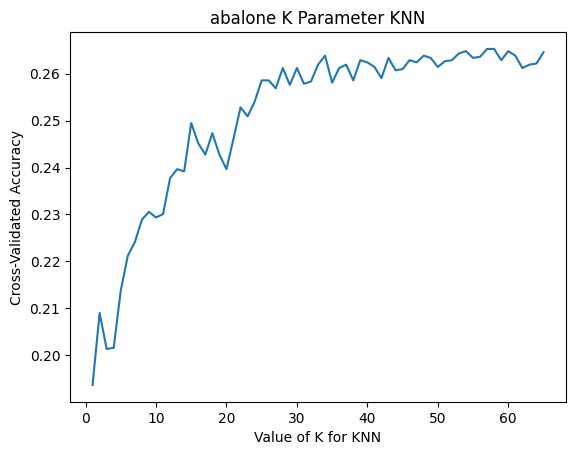

In [22]:
tune_k_hyperparamater_cross_validation(X_abalone, y_abalone, "abalone")

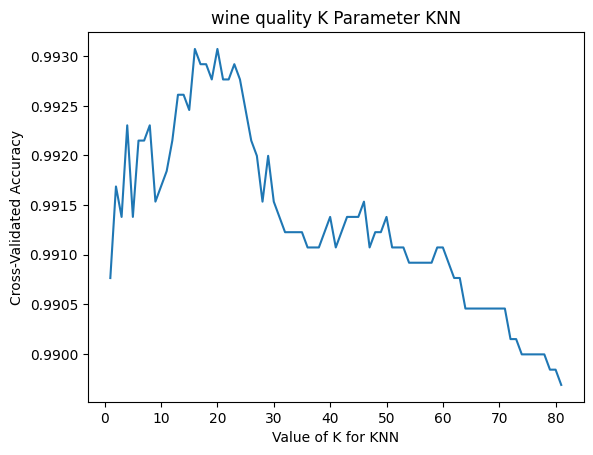

In [23]:
tune_k_hyperparamater_cross_validation(X_wine_quality, y_wine_qualtiy, "wine quality")

## Optimal K value 
The best `K` chosen is 32 for abalone and 18 for wine quality

In [24]:
# wine quality with optimal k
knn_wq_optimal = KNeighborsClassifier(n_neighbors=18)
knn_wq_optimal.fit(X_wq_train,y_wq_train)
# Predicting results using Test data set
pred_wq_optimal = knn_wq_optimal.predict(X_wq_test)
print(f"Optimal Params KNN for wine quality data set accuracy {round(accuracy_score(pred_wq_optimal,y_wq_test)*100,3)}%")

Optimal Params KNN for wine quality data set accuracy 99.077%


In [25]:
# wine quality with optimal k
knn_abalone_optimal = KNeighborsClassifier(n_neighbors=32)
knn_abalone_optimal.fit(X_abalone_train,y_abalone_train)
# Predicting results using Test data set
pred_abalone_optimal = knn_abalone_optimal.predict(X_abalone_test)
print(f"Optimal Params KNN for abalone data set accuracy {round(accuracy_score(pred_abalone_optimal,y_abalone_test)*100,3)}%")

Optimal Params KNN for abalone data set accuracy 28.828%


## Improving KNN

In [26]:
# use grid search to find optimal KNN weight - less work this way
abalone_param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [32]}
abalone_knn_weights = KNeighborsClassifier()
abalone_knn_gscv = GridSearchCV(abalone_knn_weights, abalone_param_grid, cv=5, scoring='accuracy')
abalone_knn_gscv.fit(X_abalone, y_abalone)

# get best params:
abalone_knn_gscv.best_params_
abalone_knn_gscv.cv_results_

/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.00249319, 0.00218425]),
 'std_fit_time': array([4.12325020e-04, 6.34388069e-05]),
 'mean_score_time': array([0.02576103, 0.01436329]),
 'std_score_time': array([0.0027529, 0.0002554]),
 'param_n_neighbors': masked_array(data=[32, 32],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 32, 'weights': 'uniform'},
  {'n_neighbors': 32, 'weights': 'distance'}],
 'split0_test_score': array([0.23684211, 0.22727273]),
 'split1_test_score': array([0.26674641, 0.26315789]),
 'split2_test_score': array([0.23952096, 0.23712575]),
 'split3_test_score': array([0.27305389, 0.26107784]),
 'split4_test_score': array([0.2754491 , 0.26467066]),
 'mean_test_score': array([0.25832249, 0.25066097]),
 'std_test_score': array([0.01671049, 0.01543482]),
 'rank_test_score': a

In [27]:
# use grid search to find optimal KNN weight - less work this way
wq_param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [18]}
wq_knn_weights = KNeighborsClassifier()
wq_knn_gscv = GridSearchCV(wq_knn_weights, wq_param_grid, cv=5, scoring='accuracy')
wq_knn_gscv.fit(X_wine_quality, y_wine_qualtiy)

# get best params:
wq_knn_gscv.best_params_
wq_knn_gscv.cv_results_

{'mean_fit_time': array([0.00551434, 0.00490532]),
 'std_fit_time': array([1.13247965e-03, 2.69527327e-05]),
 'mean_score_time': array([0.09226146, 0.07280579]),
 'std_score_time': array([0.00272745, 0.00552354]),
 'param_n_neighbors': masked_array(data=[18, 18],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 18, 'weights': 'uniform'},
  {'n_neighbors': 18, 'weights': 'distance'}],
 'split0_test_score': array([0.99538462, 0.99384615]),
 'split1_test_score': array([0.99153846, 0.99153846]),
 'split2_test_score': array([0.99384142, 0.99384142]),
 'split3_test_score': array([0.98845266, 0.9899923 ]),
 'split4_test_score': array([0.99538106, 0.99538106]),
 'mean_test_score': array([0.99291964, 0.99291988]),
 'std_test_score': array([0.00263992, 0.00191017]),
 'rank_test_score':

Thus, in both instances 'distance' makes the KNN perform better for KNN on abalone and wine quality data set

# 3. Decision Tree Classifier

## 3.1 Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import numpy as np

In [10]:
tree_classification_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'splitter': ['best', 'random'],
                                  'max_features': ["sqrt", "log2"],
                                  'max_depth': np.arange(1,71),
                                  'min_impurity_decrease': np.arange(0,0.05, 1),
                                  'max_leaf_nodes': np.arange(2, 21)
                                  }

In [52]:
abalone_decision_tree = DecisionTreeClassifier()
abalone_decison_tree_gscv = GridSearchCV(abalone_decision_tree, tree_classification_parameters, cv=5, scoring='accuracy')
abalone_decison_tree_gscv.fit(X_abalone, y_abalone)

/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70]),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_impurity_decrease': array([0.]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [53]:
abalone_decison_tree_gscv.best_score_

0.2762756783084549

In [54]:
abalone_decison_tree_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 45,
 'max_features': 'log2',
 'max_leaf_nodes': 17,
 'min_impurity_decrease': 0.0,
 'splitter': 'best'}

In [ ]:
tree.export_graphviz(abalone_decison_tree_gscv.best_estimator_, out_file='tree.dot')

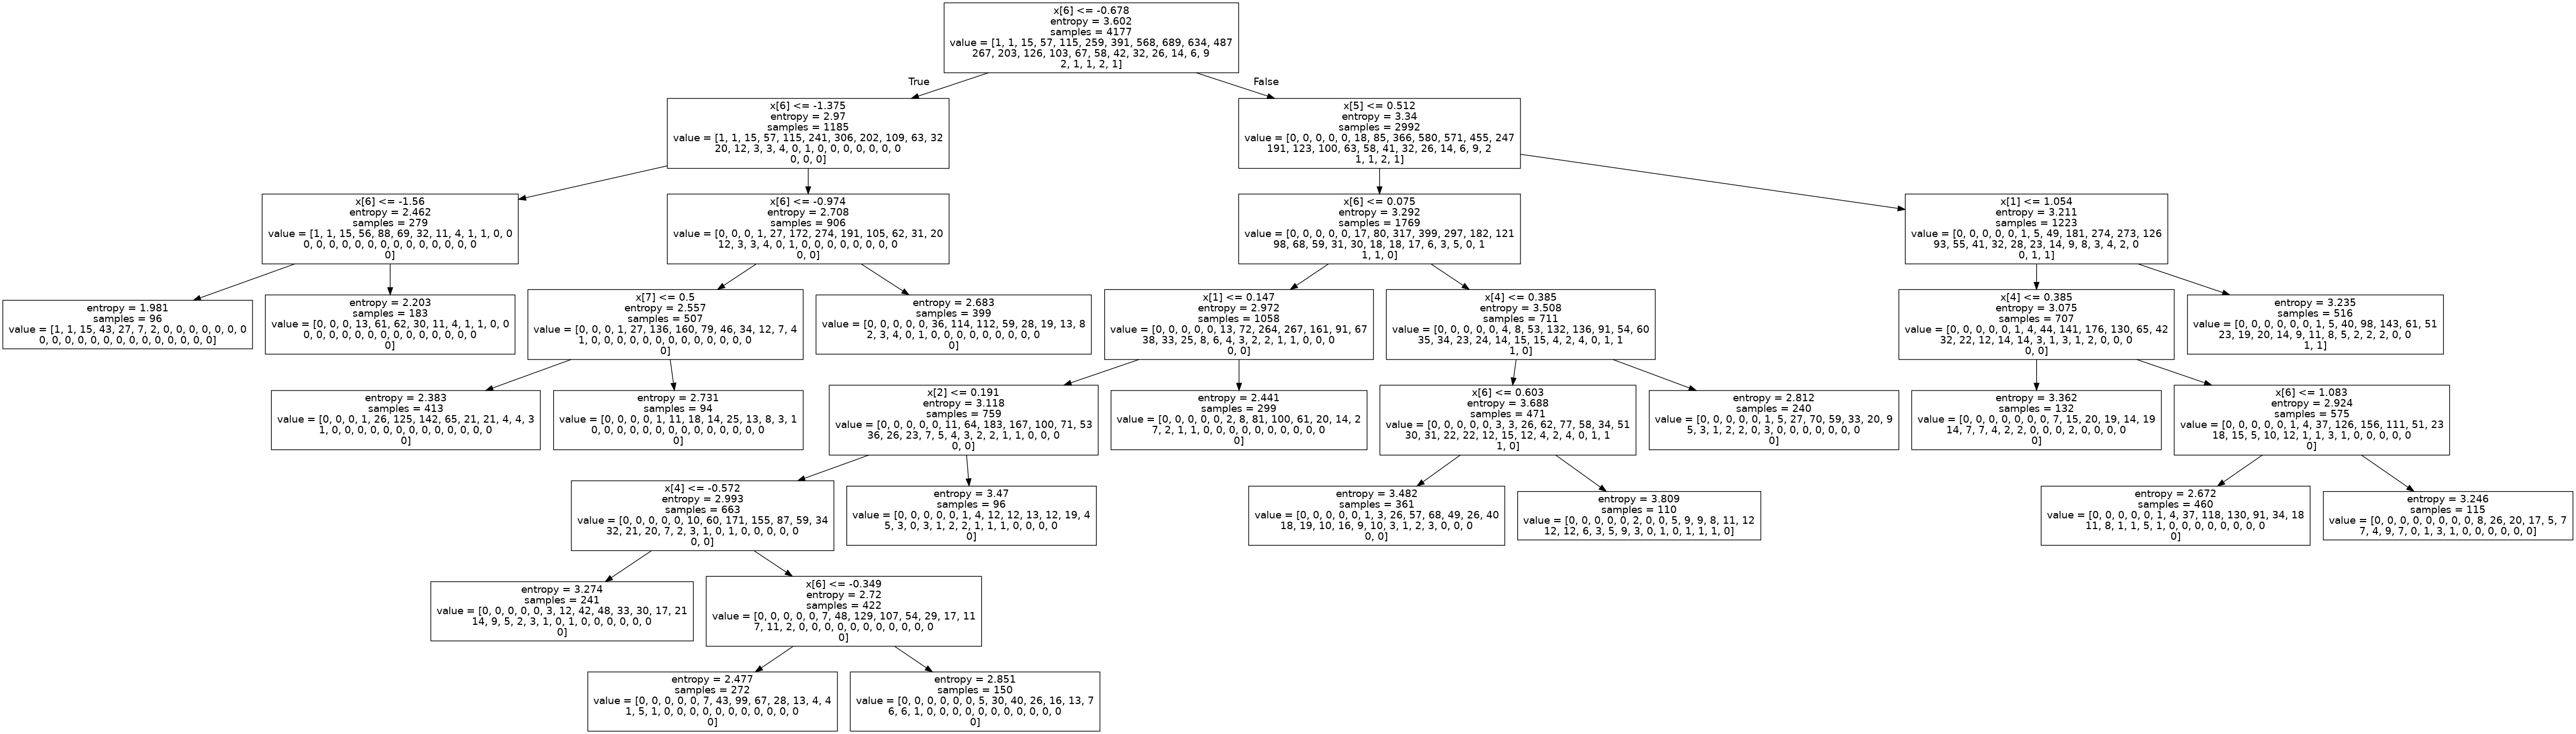

In [17]:
!dot -Tpng tree.dot -o tree.png
from IPython.display import display, Image
display(Image(filename='tree.png'))

In [12]:
wq_decision_tree = DecisionTreeClassifier()
wq_decision_tree_gscv = GridSearchCV(wq_decision_tree, tree_classification_parameters, cv=5, scoring='accuracy')
wq_decision_tree_gscv.fit(X_wine_quality, y_wine_qualtiy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70]),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_impurity_decrease': array([0.]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [13]:
wq_decision_tree_gscv.best_score_

0.9810675667673359

In [14]:
wq_decision_tree_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'splitter': 'best'}

In [15]:
tree.export_graphviz(wq_decision_tree_gscv.best_estimator_, out_file='wq_tree.dot')

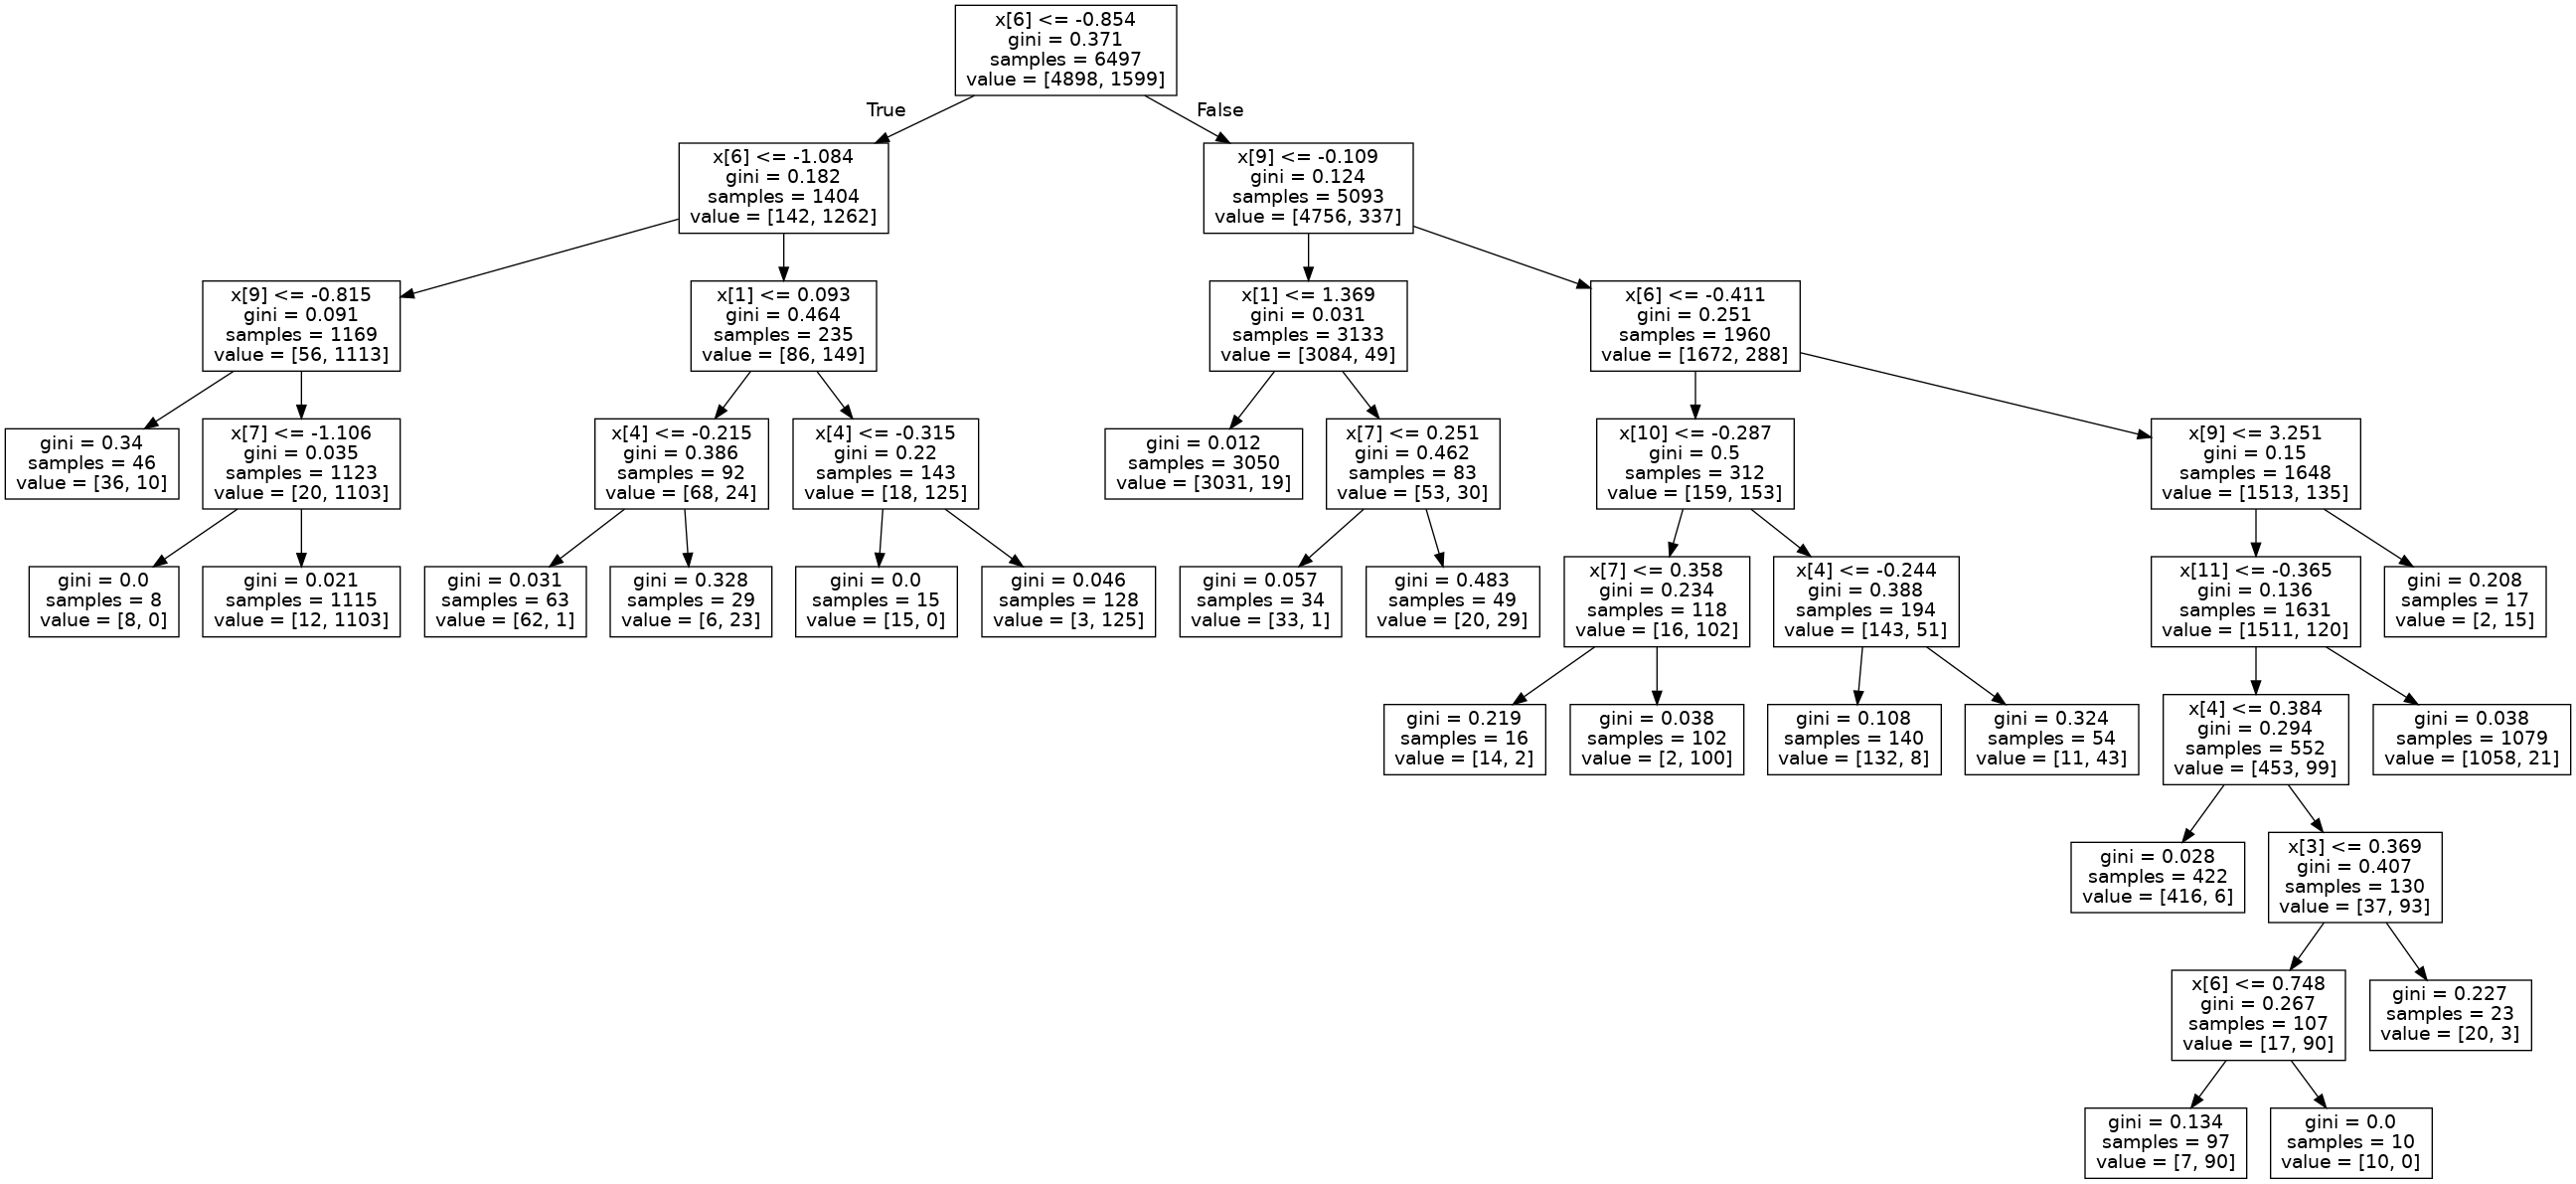

In [18]:
!dot -Tpng wq_tree.dot -o wq_tree.png
display(Image(filename='wq_tree.png'))

# 4. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest_classification_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'max_features': ["sqrt", "log2"],
                                  'max_depth': np.arange(1,71),
                                  'min_impurity_decrease': np.arange(0,0.05, 1),
                                  'max_leaf_nodes': np.arange(2, 21),
                                  'class_weight': ['balanced', 'balanced_subsample'],
                                  'n_estimators': np.arange(3, 5, 300)
                                  }

In [29]:
abalone_random_forest = RandomForestClassifier()
abalone_random_forsest_gscv = GridSearchCV(abalone_random_forest, random_forest_classification_parameters, cv=5, scoring='accuracy')
abalone_random_forsest_gscv.fit(X_abalone, y_abalone)

/home/niiquaye/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70]),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_impurity_decrease': array([0.]),
                         'n_estimators': array([3])},
             scoring='accuracy')

In [30]:
abalone_random_forsest_gscv.best_score_

0.1984688995215311

In [31]:
abalone_random_forsest_gscv.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 38,
 'max_features': 'log2',
 'max_leaf_nodes': 19,
 'min_impurity_decrease': 0.0,
 'n_estimators': 3}